In [19]:
# import libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from numpy.random import seed # for reproducible results
seed(1)
from tensorflow import set_random_seed # TensorFlow has its own random number generator
set_random_seed(2)

In [2]:
# read data
df = pd.read_csv('wineQualityReds.csv')

# deletes first column
df.drop(df.columns[0],1, inplace=True)

In [3]:
print(df['quality'].value_counts())
print(df['quality'].shape)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
(1599,)



*   The dataset is very imbalanced
*   Most of the target values are 5
*   Only 10 observations are of class 3

In [4]:
# shows the dataframe
print(df)

# define X and y
X = df.drop('quality',1)
y = df.quality

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free.sulfur.dioxide  

In [5]:
from imblearn.over_sampling import SMOTE

# stops annoying warning
import warnings
warnings.filterwarnings("ignore")

# save name of columns
feature_columns = X.columns

# implements smote
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

X_res = pd.DataFrame(X_res, columns=feature_columns)
y_res = pd.DataFrame(y_res, columns=['quality'])
print(y_res['quality'].value_counts())

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64


In [6]:
scaler = preprocessing.StandardScaler()
X_normalized = scaler.fit_transform(X_res)
X_normalized = pd.DataFrame(X_normalized, columns=feature_columns)

print(X_normalized)

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0         -0.595650          0.466480    -1.360659       -0.579236  -0.288855   
1         -0.350979          1.194378    -1.360659       -0.018798   0.177537   
2         -0.350979          0.709113    -1.162606       -0.258986   0.050339   
3          1.728725         -1.231950     1.412090       -0.579236  -0.310055   
4         -0.595650          0.466480    -1.360659       -0.579236  -0.288855   
...             ...               ...          ...             ...        ...   
4081       0.081626         -0.503384     0.489959       -0.715048  -0.413763   
4082       1.219326         -0.077836     1.551205        1.479950  -0.221553   
4083      -0.001834         -0.888936     0.614400       -0.464456  -0.639306   
4084      -0.040895         -0.443840     0.618314       -0.033699  -0.265850   
4085       1.933832         -1.069235     1.778522       -0.404618  -0.364973   

      free.sulfur.dioxide  

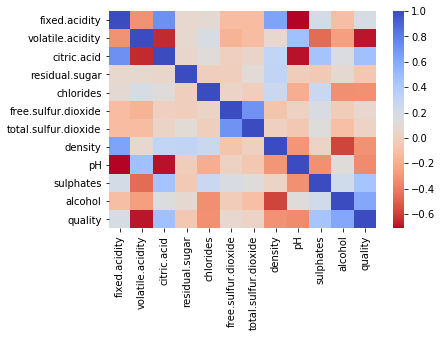

In [7]:
# visualize correlations
corr = X_normalized.join(y_res).corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

There is a very subtle correlation between quality and the features.

*   **Negative correlation:** volatile acidity, chlorides
*   **Positive correlation:** citric acid



In [8]:
# one-hot encoding
y_cat = pd.get_dummies(y_res['quality'])

# separate data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y_cat)


print(X_train.shape)
print(y_train.shape)

# now y_train is a matrix
print(y_train)

(3064, 11)
(3064, 6)
      3  4  5  6  7  8
771   0  0  1  0  0  0
2776  0  1  0  0  0  0
4034  0  0  0  0  0  1
1520  0  0  0  1  0  0
3948  0  0  0  0  0  1
...  .. .. .. .. .. ..
2412  0  1  0  0  0  0
2810  0  1  0  0  0  0
457   0  0  1  0  0  0
3605  0  0  0  0  0  1
1992  1  0  0  0  0  0

[3064 rows x 6 columns]


Steps for building neural network:

1.   Build model (keras.Sequential)
2.   Compile model (model.compile)
3.   Fit model (model.fit)





In [9]:
n_inputs = X_train.shape[1]

model = Sequential()

model.add(Dense(units=n_inputs, activation="relu", input_shape=(n_inputs, )))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=6, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=164, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 3064 samples, validate on 1022 samples
Epoch 1/164
3064/3064 [==============================] - 0s 96us/step - loss: 1.3792 - accuracy: 0.4429 - val_loss: 1.1756 - val_accuracy: 0.4932
Epoch 2/164
3064/3064 [==============================] - 0s 38us/step - loss: 1.0640 - accuracy: 0.5565 - val_loss: 1.0851 - val_accuracy: 0.5147
Epoch 3/164
3064/3064 [==============================] - 0s 49us/step - loss: 0.9852 - accuracy: 0.5849 - val_loss: 1.0118 - val_accuracy: 0.5587
Epoch 4/164
3064/3064 [==============================] - 0s 37us/step - loss: 0.9296 - accuracy: 0.6080 - val_loss: 0.9446 - val_accuracy: 0.6037
Epoch 5/164
3064/3064 [==============================] - 0s 38us/step - loss: 0.8793 - accuracy: 0.6289 - val_loss: 0.9058 - val_accuracy: 0.6145
Epoch 6/164
3064/3064 [==============================] - 0s 38us/step - loss: 0.8365 - accuracy: 0.6465 - val_loss: 0.8656 - val_accuracy: 0.6292
Epoch 7/164
3064/3064 [=====

Epoch 55/164
3064/3064 [==============================] - 0s 35us/step - loss: 0.3335 - accuracy: 0.8714 - val_loss: 0.5379 - val_accuracy: 0.7916
Epoch 56/164
3064/3064 [==============================] - 0s 34us/step - loss: 0.3280 - accuracy: 0.8727 - val_loss: 0.5519 - val_accuracy: 0.7877
Epoch 57/164
3064/3064 [==============================] - 0s 34us/step - loss: 0.3268 - accuracy: 0.8688 - val_loss: 0.5618 - val_accuracy: 0.7955
Epoch 58/164
3064/3064 [==============================] - 0s 34us/step - loss: 0.3244 - accuracy: 0.8773 - val_loss: 0.5753 - val_accuracy: 0.7710
Epoch 59/164
3064/3064 [==============================] - 0s 34us/step - loss: 0.3216 - accuracy: 0.8763 - val_loss: 0.5547 - val_accuracy: 0.8004
Epoch 60/164
3064/3064 [==============================] - 0s 37us/step - loss: 0.3183 - accuracy: 0.8747 - val_loss: 0.5468 - val_accuracy: 0.7945
Epoch 61/164
3064/3064 [==============================] - 0s 34us/step - loss: 0.3153 - accuracy: 0.8750 - val_loss: 0

3064/3064 [==============================] - 0s 35us/step - loss: 0.1897 - accuracy: 0.9298 - val_loss: 0.6407 - val_accuracy: 0.8063
Epoch 111/164
3064/3064 [==============================] - 0s 35us/step - loss: 0.1871 - accuracy: 0.9289 - val_loss: 0.6466 - val_accuracy: 0.8112
Epoch 112/164
3064/3064 [==============================] - 0s 38us/step - loss: 0.1799 - accuracy: 0.9393 - val_loss: 0.6194 - val_accuracy: 0.8063
Epoch 113/164
3064/3064 [==============================] - 0s 35us/step - loss: 0.1801 - accuracy: 0.9351 - val_loss: 0.6392 - val_accuracy: 0.8121
Epoch 114/164
3064/3064 [==============================] - 0s 35us/step - loss: 0.1809 - accuracy: 0.9311 - val_loss: 0.6273 - val_accuracy: 0.8102
Epoch 115/164
3064/3064 [==============================] - 0s 35us/step - loss: 0.1735 - accuracy: 0.9354 - val_loss: 0.6427 - val_accuracy: 0.8170
Epoch 116/164
3064/3064 [==============================] - 0s 36us/step - loss: 0.1737 - accuracy: 0.9399 - val_loss: 0.6419 -

In [12]:
# make 1 particular prediction (IMPORTANT: always need to scale first)
make_prediction = scaler.transform(np.array([[7.4,0.59,0.08,4.4,0.086,6,29,0.9974,3.38,0.5,9]]))
predictions = model.predict(make_prediction)

# devuelve array con probabilidades de pertenecer a cada clase
print(predictions)

[[1.0714223e-10 9.8747861e-01 7.3001082e-03 5.2213580e-03 3.2300758e-08
  0.0000000e+00]]


In [13]:
# return the index with the higher value (probability)
prediction = np.argmax(predictions)

print('Predicted class is:', y_cat.columns[prediction])

Predicted class is: 4


(Text(33.0, 0.5, 'True Class'), Text(0.5, 15.0, 'Predicted Class'))

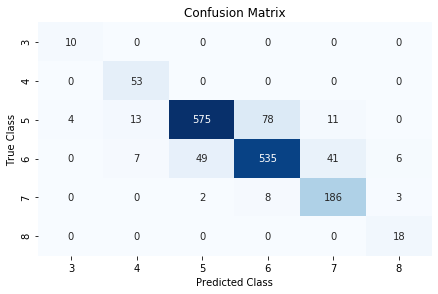

In [14]:
# standarize original values
X_standarized = scaler.transform(X)

# predict values
predictions = model.predict([X_standarized])

# gets indexes with higher probabilty predicted in last step
indexes = np.argmax(predictions, axis=1)

# creates a list with the original target tags
predicted_values = []
for i in indexes:
    predicted_values.append(y_cat.columns[i])

# convert to pandas series
predicted_values = pd.Series(predicted_values)

# Create confusion matrix
matrix = confusion_matrix(y, predicted_values)
matrix = pd.DataFrame(matrix, index=y_cat.columns, columns=y_cat.columns)

# Create heatmap
sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

Text(0, 0.5, 'Accuracy Score')

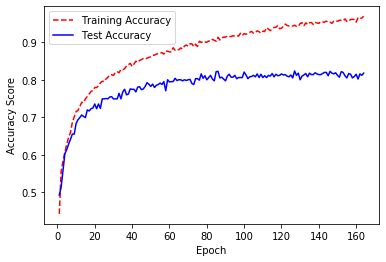

In [15]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)


plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")

In [16]:
print(f'Training accuracy: {round(training_accuracy[-1]*100,1)} %')
print(f'Test accuracy: {round(test_accuracy[-1]*100,1)} %')

Training accuracy: 97.0 %
Test accuracy: 81.8 %


In [18]:
# save neural network
model.save("wine_model.h5")

# Conclusion

A Neural Network model was implemented, consisting of 1 input layer, 2 hidden layers with 100 units each and 1 output layer with 1 unit per class (6 in total).

The test accuracy is in the order of 80%. (81,8% for this particular seed)